In [79]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [80]:
mnist = tf.keras.datasets.mnist

In [81]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [82]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)
model.save('Hand-Written.model')

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3121 - accuracy: 0.9148
Epoch 2/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1382 - accuracy: 0.9599


INFO:tensorflow:Assets written to: Hand-Written.model\assets


INFO:tensorflow:Assets written to: Hand-Written.model\assets


In [84]:
model = tf.keras.models.load_model('Hand-Written.model')

In [85]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9636
0.12363122403621674
0.9635999798774719


1/1 [==============================] - 0s 15ms/step
This Digit is probably a 4


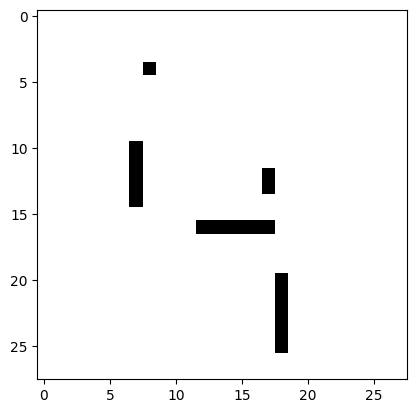

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_number = 4

image_path = f'Digits/img{image_number}.png'

if os.path.isfile(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        _, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        img_binary = np.invert(np.array([img_binary]))
        prediction = model.predict(img_binary)
        print(f'This Digit is probably a {np.argmax(prediction)}')
        plt.imshow(img_binary[0], cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(f'Error: {str(e)}')
else:
    print(f'Image {image_path} does not exist.')
